**Insurance is a policy that helps to cover up all loss or decrease loss in terms of expenses incurred by various risks. A number of variables affect how much insurance costs. These considerations of different factors contribute to the insurance policy cost expression. 
      Machine Learning( ML) in the insurance sector can make insurance more effective. In the domains of computational and applied mathematics the machine learning (ML) is a well-known research area**

ASSUMPTION
-  There is no biasedness in data, dataset primarily includes data from a specific geographic region or demographic group.
-  variable present in datasets only affect the medical insurance cost like diabetic person adjusted by bmi and alcholic personor high blood pressure not affect our data so much.
- the biggest factor that affect insurance charges are smoker,age and bmi

-  research question
-  hypothesis

*Importing needful libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook",palette="Spectral",style="darkgrid",font_scale=1,color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from miditk.smf import MidiFileWriter

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
insurance_cost=pd.read_csv('insurance.csv')
insurance_cost   # loading the csv file using pandas data frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


*Data analysis and cleaning*

In [3]:
insurance_cost.head() # Familiar with data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_cost.tail(15)

,age,sex,bmi,children,smoker,region,charges
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500


In [5]:
insurance_cost.shape

(1338, 7)

In [6]:
insurance_cost.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
for col in insurance_cost.describe(include=object).columns:
    print(col)
    print(insurance_cost[col].unique())
    print('--'*40)

sex
['female' 'male']
--------------------------------------------------------------------------------
smoker
['yes' 'no']
--------------------------------------------------------------------------------
region
['southwest' 'southeast' 'northwest' 'northeast']
--------------------------------------------------------------------------------


In [8]:

insurance_cost.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:

insurance_cost.dtypes[insurance_cost.dtypes!=object].index

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [10]:
# checking missing values
insurance_cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
insurance_cost=insurance_cost.drop_duplicates() # drop duplicates entry
insurance_cost.shape

(1337, 7)

In [12]:
insurance_cost.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

<Figure size 24000x16000 with 0 Axes>

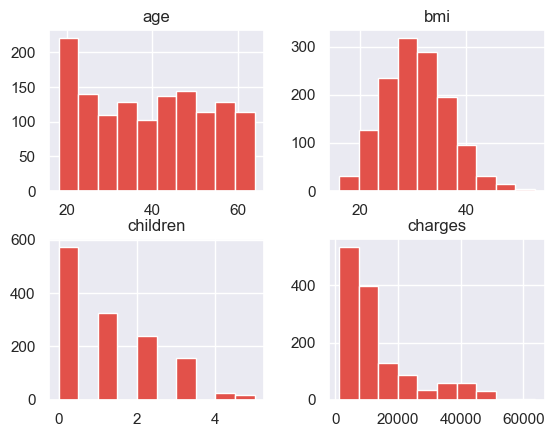

In [13]:
plt.figure(figsize=(12,8),dpi=2000)
insurance_cost.hist(bins=10)

<Figure size 24000x16000 with 0 Axes>

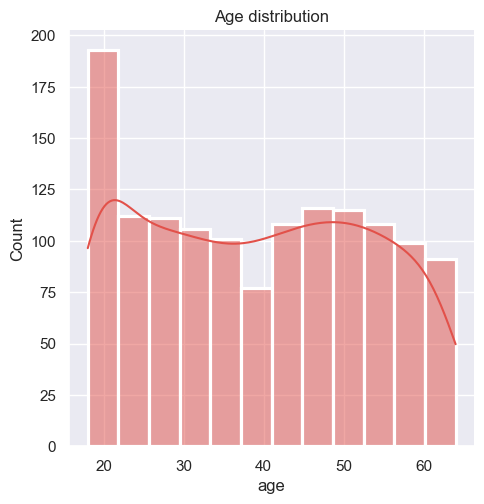

In [14]:

plt.figure(figsize=(12,8),dpi=2000)
sns.displot(insurance_cost["age"],lw=10,kde=True)
plt.title("Age distribution")
plt.show()

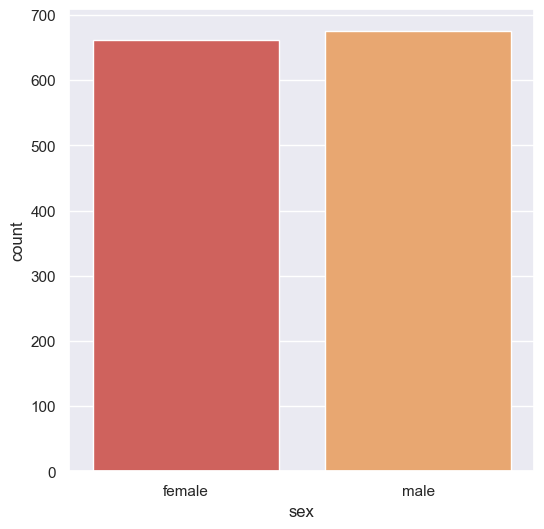

In [15]:

plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=insurance_cost)
plt.show() # this show that no biasedness in gender

<Figure size 24000x12000 with 0 Axes>

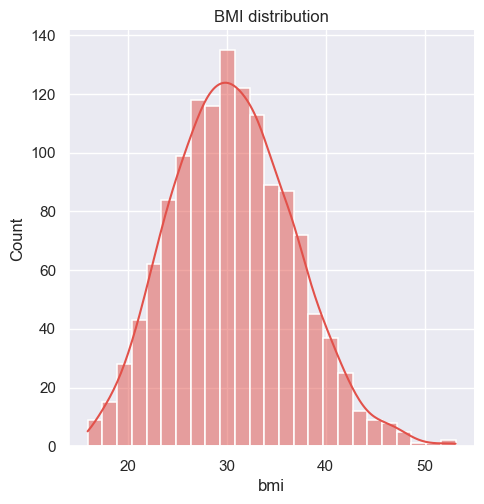

In [16]:

plt.figure(figsize=(12,6),dpi=2000)
sns.displot(insurance_cost["bmi"],lw=20,kde=True)
plt.title("BMI distribution")
plt.show()

if your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range

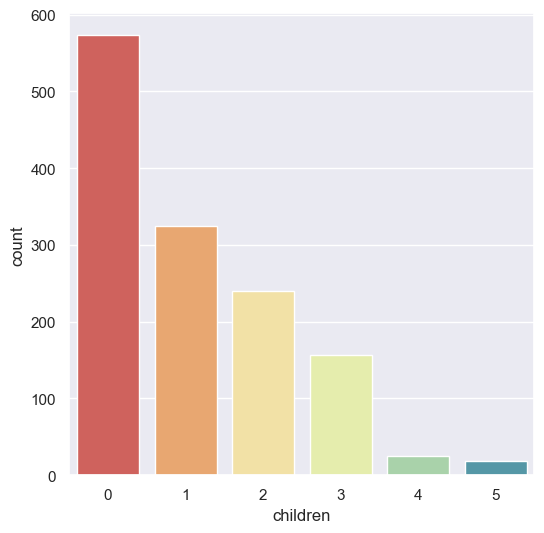

In [17]:

plt.figure(figsize=(6,6))
sns.countplot(x="children",data=insurance_cost)
plt.show()

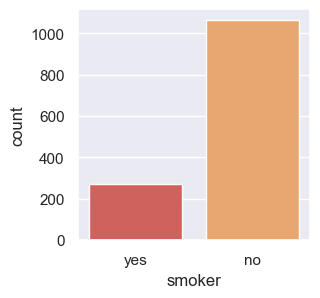

In [18]:

plt.figure(figsize=(3,3),dpi=100)
sns.countplot(x="smoker",data=insurance_cost)
plt.show()

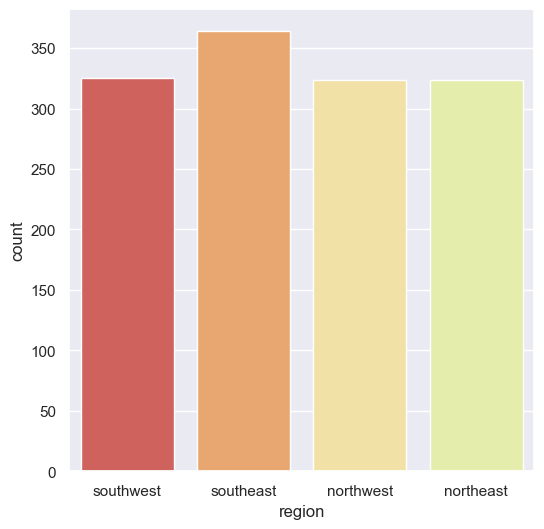

In [19]:

plt.figure(figsize=(6,6),dpi=100)
sns.countplot(x="region",data=insurance_cost)
plt.show()

<Figure size 600x600 with 0 Axes>

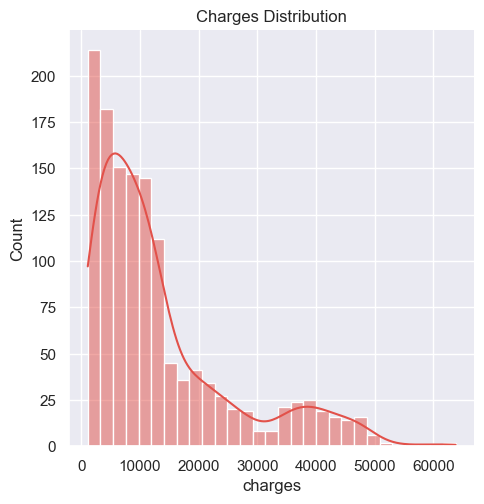

In [20]:
# distribution of chares taken
plt.figure(figsize=(6,6))
sns.displot(insurance_cost["charges"],lw=20,kde=True)
plt.title("Charges Distribution")

plt.show()

In [21]:
# on-hot Encoding the Categorical variables
bmi=insurance_cost['bmi']
# print(bmi)
x=insurance_cost.drop('bmi',axis=1)
# print(x)

df_objs = pd.get_dummies(x,drop_first=True).astype(int) # female=0,smoker_yes=1,
df_objs=pd.concat([df_objs,bmi],axis=1) 
df_objs

,age,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi
0,19,0,16884,0,1,0,0,1,27.900
1,18,1,1725,1,0,0,1,0,33.770
2,28,3,4449,1,0,0,1,0,33.000
3,33,0,21984,1,0,1,0,0,22.705
4,32,0,3866,1,0,1,0,0,28.880
...,...,...,...,...,...,...,...,...,...
1333,50,3,10600,1,0,1,0,0,30.970
1334,18,0,2205,0,0,0,0,0,31.920
1335,18,0,1629,0,0,0,1,0,36.850
1336,21,0,2007,0,0,0,0,1,25.800


<Axes: >

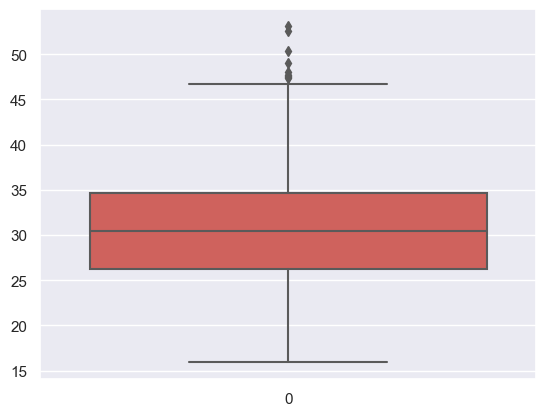

In [22]:
sns.boxplot(df_objs['bmi']) # outlier in data


In [23]:
df_objs=df_objs[df_objs['bmi']<47]
df_objs

,age,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi
0,19,0,16884,0,1,0,0,1,27.900
1,18,1,1725,1,0,0,1,0,33.770
2,28,3,4449,1,0,0,1,0,33.000
3,33,0,21984,1,0,1,0,0,22.705
4,32,0,3866,1,0,1,0,0,28.880
...,...,...,...,...,...,...,...,...,...
1333,50,3,10600,1,0,1,0,0,30.970
1334,18,0,2205,0,0,0,0,0,31.920
1335,18,0,1629,0,0,0,1,0,36.850
1336,21,0,2007,0,0,0,0,1,25.800


<Axes: >

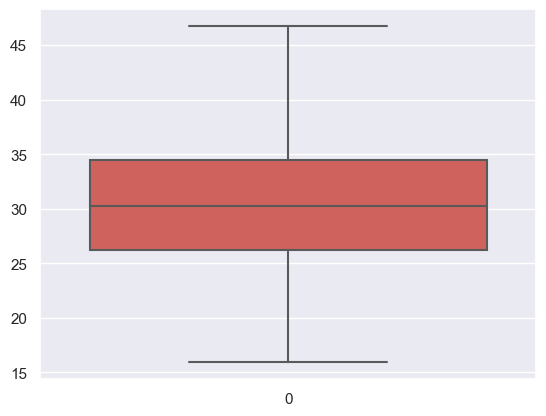

In [24]:
sns.boxplot(df_objs['bmi']) # outlier in data


In [25]:
df_objs.corr()['charges'].sort_values()

region_southwest   -0.046340
region_northwest   -0.036483
sex_male            0.064163
children            0.069126
region_southeast    0.071190
bmi                 0.193271
age                 0.301317
smoker_yes          0.785895
charges             1.000000
Name: charges, dtype: float64

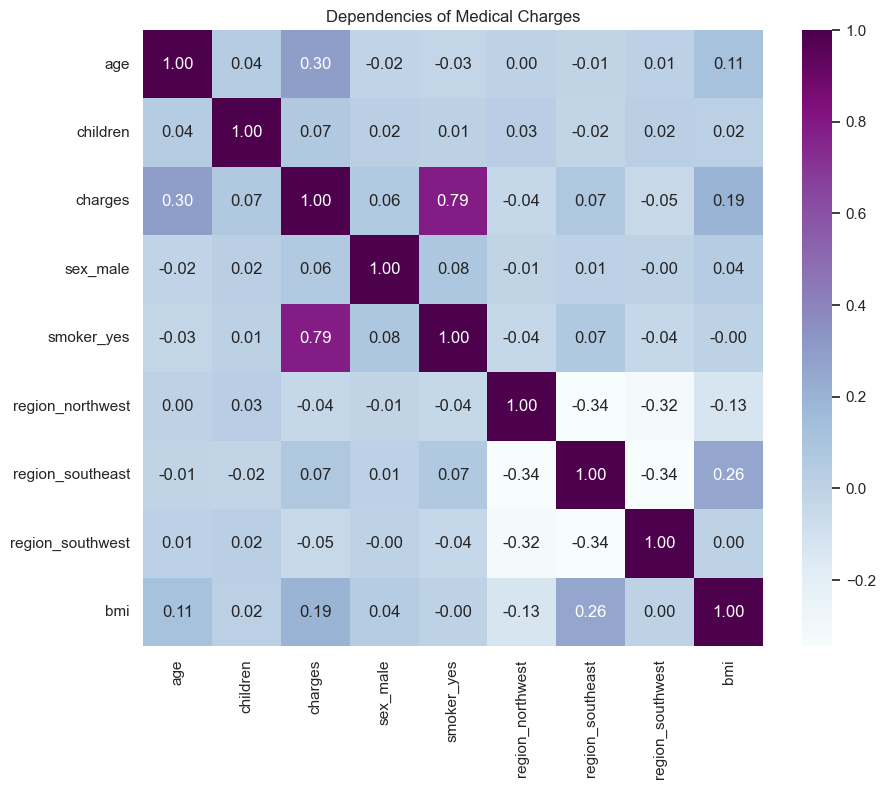

In [26]:
corr = df_objs.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges") # for checking multicollinearity
# plt.savefig('./sampleImages/Cor')
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

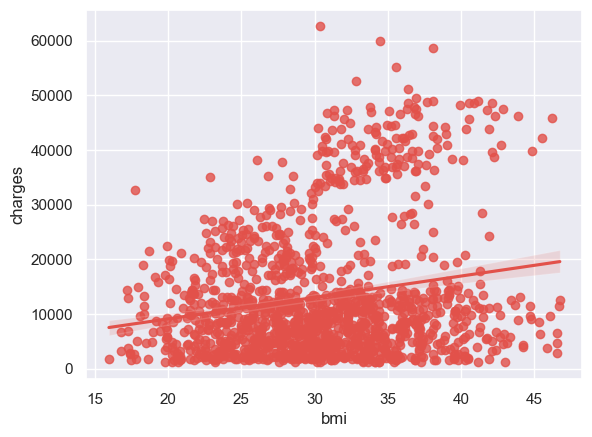

In [27]:

sns.regplot(x='bmi',y='charges',data=df_objs)

In [28]:
x= df_objs.drop('charges',axis=1)


y = df_objs['charges']


<Axes: xlabel='bmi', ylabel='charges'>

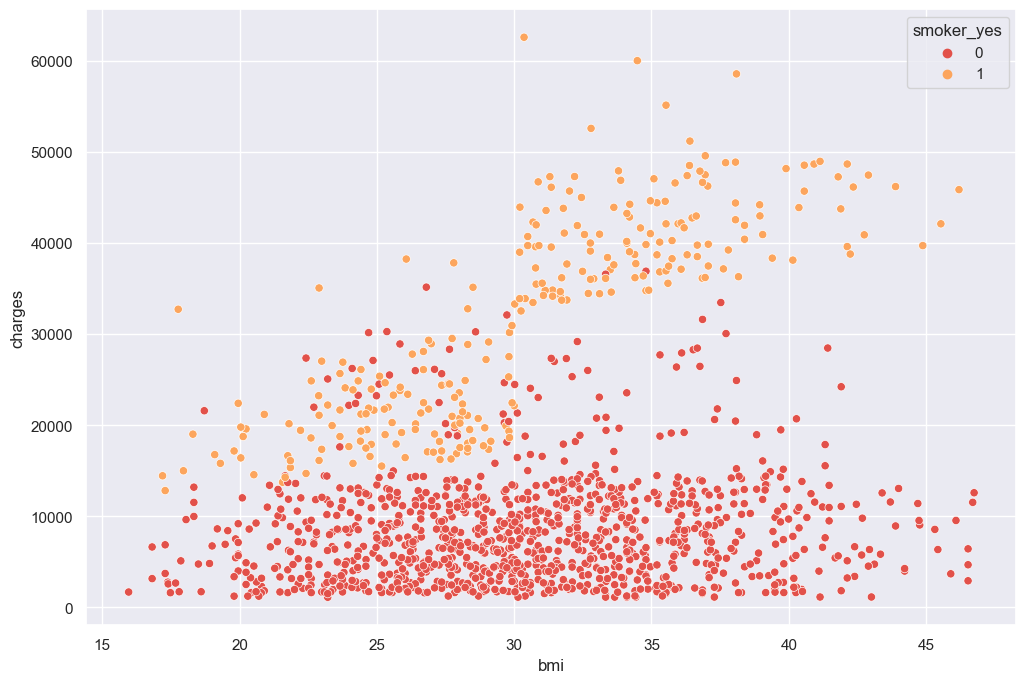

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='bmi',y='charges',data=df_objs,hue='smoker_yes')

<Axes: xlabel='age', ylabel='charges'>

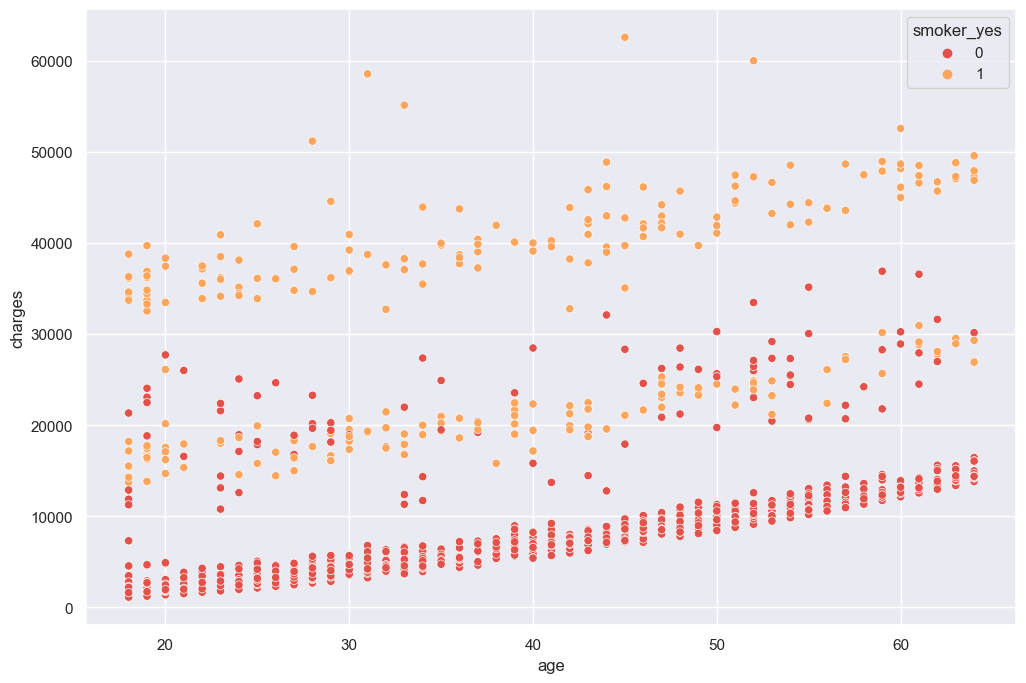

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='charges',data=df_objs,hue='smoker_yes')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [33]:
X_train

,age,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi
900,49,0,1,0,0,0,0,22.515
1092,23,3,1,0,0,0,1,32.700
641,42,3,1,1,1,0,0,28.310
1223,20,0,0,1,0,1,0,24.420
68,40,0,0,0,0,1,0,36.190
...,...,...,...,...,...,...,...,...
579,25,0,0,0,0,0,0,23.465
980,54,1,1,0,0,0,0,25.460
75,57,0,1,0,1,0,0,34.010
604,19,0,0,1,1,0,0,28.310


In [34]:
X_test

,age,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi
665,43,2,1,1,0,1,0,38.06
810,46,3,0,0,0,0,1,30.80
567,41,2,1,0,1,0,0,30.59
920,62,0,0,0,0,0,1,25.00
504,38,1,0,0,0,1,0,28.93
...,...,...,...,...,...,...,...,...
591,47,1,1,0,1,0,0,19.57
320,34,1,1,0,1,0,0,25.27
758,30,3,1,0,0,0,0,37.43
275,47,2,0,0,0,0,0,26.60


Five main assumptions underlying multiple regression models must be satisfied: (1) linearity, (2) homoskedasticity, (3) independence of errors, (4) normality, and (5) independence of independent variables.

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [38]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [39]:
test_predictions

array([35322.4054811 , 10717.86571632,  9570.90789791, 11656.66969955,
        6979.21510244, 14481.67144531, 14023.95067284, 14972.40618934,
       15809.5856281 , 10179.36968007, -1644.47574746, 14446.58103658,
        3052.91755691, 35200.33904041,  7517.75165196, 13606.61595103,
       10927.77810702,  9992.74338919,  7971.89893981, 22863.34047357,
       33763.99723902, 13316.30839855, 31508.88973292,  3448.12564051,
       10623.96570987, 10962.52424609, 11318.67398567, 15361.71505878,
        5999.91899033,  9630.23540767,  6914.62763892,  4258.90891207,
        1993.527315  ,  8721.80547724, 31440.25284604, 18157.46777585,
       12519.9121234 ,  9434.53385632,  3166.86572787,  3938.39351976,
       26596.98010168, 10863.02650622,  3655.6664212 , 30257.98640109,
       32849.43953078,  5964.91043841,  2079.305192  ,  5291.25730848,
       28611.77103626,  2700.88156629, 37899.8435506 , 25089.2495027 ,
        2161.11065717, 14995.35495751,  2641.5185686 , 18217.29219114,
      

In [40]:

from sklearn.metrics import r2_score
train1_score=model.score(X_train,y_train)
print("Train score:",train1_score)

Train score: 0.7620121652915646


In [41]:
score=r2_score(y_test,test_predictions)
print("r_2 score=",score)

r_2 score= 0.7167492044207451


In [42]:
df_objs['charges'].mean()

13220.554969879518

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [45]:
print(MAE)
print(MSE)
print(RMSE)

4195.633518698326
38086783.82062406
6171.449085962231


In [46]:
# # predicting
# input_data=np.array(())
# input_data_as_numpy_array=np.asarray(input_data)
# input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
# prediction=model.predict(input_data_reshaped)
# prediction
df_objs


,age,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi
0,19,0,16884,0,1,0,0,1,27.900
1,18,1,1725,1,0,0,1,0,33.770
2,28,3,4449,1,0,0,1,0,33.000
3,33,0,21984,1,0,1,0,0,22.705
4,32,0,3866,1,0,1,0,0,28.880
...,...,...,...,...,...,...,...,...,...
1333,50,3,10600,1,0,1,0,0,30.970
1334,18,0,2205,0,0,0,0,0,31.920
1335,18,0,1629,0,0,0,1,0,36.850
1336,21,0,2007,0,0,0,0,1,25.800


In [47]:
# predicting
input_data=np.array((61,0,0,1,1,0,0,29.070))
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
prediction


array([37298.26317505])

In [48]:
print("intercept ",model.intercept_)

intercept  -12759.540326831026


In [49]:
print("Coeff ",model.coef_)

Coeff  [  260.71162991   383.42670012  -223.65391704 23602.02889184
   115.72397955  -938.09195143  -723.35066168   359.01758534]


In [50]:
df4=pd.DataFrame({'actual':y_test,'predicted':test_predictions,'variance':y_test-test_predictions})
df4

,actual,predicted,variance
665,42560,35322.405481,7237.594519
810,9414,10717.865716,-1303.865716
567,7256,9570.907898,-2314.907898
920,13451,11656.669700,1794.330300
504,5974,6979.215102,-1005.215102
...,...,...,...
591,8428,6795.377187,1632.622813
320,4894,5452.526234,-558.526234
758,5428,9426.462973,-3998.462973
275,9715,9810.627449,-95.627449


In [51]:
import scipy as sp

<Axes: title={'center': 'Log of Insurance Charges Distribution'}, ylabel='Frequency'>

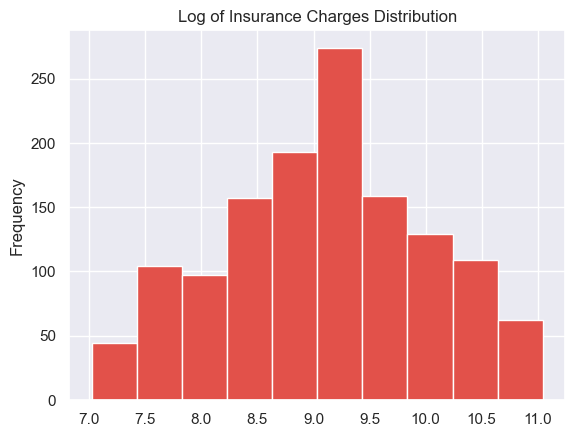

In [52]:
df_objs['charges_log'] = np.log(df_objs['charges']) 
df_objs['charges_log'].plot(kind='hist', title= 'Log of Insurance Charges Distribution')

We will use the feature selection method by backward elimination.It is used to remove those features that do not have a significant effect on the dependent variable.
We need to select the significance level to stay in the model (SL=0.05)
Now we will remove all those predictor variable from our data which has high p value.

In [53]:
target_name = "charges_log"
y = df_objs[target_name]
X = df_objs.drop(target_name,axis=1) 


In [54]:
#add a coloumn of 1s as integer type data
X1=np.append(arr=np.ones((1328,1)).astype(int),values=X,axis=1)
# df_objs.shape
X1

array([[ 1.  , 19.  ,  0.  , ...,  0.  ,  1.  , 27.9 ],
       [ 1.  , 18.  ,  1.  , ...,  1.  ,  0.  , 33.77],
       [ 1.  , 28.  ,  3.  , ...,  1.  ,  0.  , 33.  ],
       ...,
       [ 1.  , 18.  ,  0.  , ...,  1.  ,  0.  , 36.85],
       [ 1.  , 21.  ,  0.  , ...,  0.  ,  1.  , 25.8 ],
       [ 1.  , 61.  ,  0.  , ...,  0.  ,  0.  , 29.07]])

In [55]:
#choose a significance level usually 0.05,if p>0.05
#for the highest values parameter,remove that value
X_opt = X1[:,[0,1,2,3,4,5,6,7,8]]
X_opt

array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  1.,  0.],
       [ 1., 28.,  3., ...,  0.,  1.,  0.],
       ...,
       [ 1., 18.,  0., ...,  0.,  1.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  1.,  0.,  0.]])

In [56]:
import statsmodels.api as sm
ols = sm.OLS(endog=y,exog=X_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            charges_log   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1345.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:18:49   Log-Likelihood:                -296.21
No. Observations:                1328   AIC:                             610.4
Df Residuals:                    1319   BIC:                             657.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5414      0.031    241.870      0.000       7.480       7.603
x1             0.0208      0.001     29.877      0.000       0.019       0.022
x2             0.0755      0.007     10.878      0.000       0.062       0.089
x3          5.272e-05   1.32e-06     39.888      0.000    5.01e-05    5.53e-05
x4            -0.0724      0.017     -4.329      0.000      -0.105      -0.040
x5             0.3020      0.037      8.070      0.000       0.229       0.375
x6            -0.0435      0.024     -1.822      0.069      -0.090       0.003
x7            -0.1178      0.023     -5.052      0.000      -0.164      -0.072
x8            -0.0833      0.024     -3.487      0.001      -0.130      -0.036
==============================================================================
Omnibus:                       52.009   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.869
Skew:                          -0.057   Prob(JB):                     7.77e-33
Kurtosis:                       4.631   Cond. No.                     8.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
X_opt1=X1[:,[0,1,2,3,4,5,6,8]]
X_opt1.shape

(1328, 8)

#Removing the 7th coloumn (X7=southeast) from X1 as its highest p value is 0.820 building the ols model with the remaining features and 
#check the most significant values.


In [58]:
ols = sm.OLS(endog=y,exog=X_opt1).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            charges_log   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1506.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:18:49   Log-Likelihood:                -308.93
No. Observations:                1328   AIC:                             633.9
Df Residuals:                    1320   BIC:                             675.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4796      0.029    258.442      0.000       7.423       7.536
x1             0.0208      0.001     29.682      0.000       0.019       0.022
x2             0.0754      0.007     10.764      0.000       0.062       0.089
x3          5.261e-05   1.33e-06     39.443      0.000       5e-05    5.52e-05
x4            -0.0726      0.017     -4.301      0.000      -0.106      -0.039
x5             0.3009      0.038      7.966      0.000       0.227       0.375
x6             0.0181      0.021      0.874      0.382      -0.023       0.059
x7            -0.0217      0.021     -1.047      0.295      -0.062       0.019
==============================================================================
Omnibus:                       52.956   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.335
Skew:                          -0.096   Prob(JB):                     1.02e-32
Kurtosis:                       4.620   Cond. No.                     8.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(df_objs[["age",	"bmi",	"children",	"sex_male",	"smoker_yes",	"region_northwest",		"region_southwest"]],df_objs["charges_log"],test_size=0.2,random_state=0)
new_model = LinearRegression()
new_model.fit(X_train,y_train)

LinearRegression()

In [60]:
#train score after applying backward elimination method
from sklearn.metrics import r2_score
train1_score=new_model.score(X_train,y_train)
print("Train score:",train1_score)

Train score: 0.7752529368091895


In [61]:
# After aookying backeard elimination we get r2_core 0.77525 i.e, is improve from previious one

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3109820777.py, line 14)

In [62]:
new_pred=new_model.predict(X_test)

In [63]:
score=r2_score(y_test,new_pred)
print("r_2 score",score)

r_2 score 0.7063132191481535


In [64]:
score=r2_score(y_test,new_pred)
print("r_2 score",score)

r_2 score 0.7063132191481535


In [65]:
#checking for mean of residuals
residuals = y_test.values-new_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.04306583228989936


In [66]:
# y_test.values
# residuals
new_pred

array([ 7.90997688,  8.65384376, 10.22710246, 10.97627726,  9.07986458,
       10.28470167,  9.52199761,  9.29028528,  9.2712647 ,  8.88969289,
       11.06791936,  9.55727873,  8.91950404,  8.93288632,  9.49454147,
        8.8610498 ,  9.16713709,  8.48665582,  7.99784139, 10.53072429,
        9.65483917,  9.11148417,  9.01575351,  8.3545323 ,  8.24220474,
        9.20367444,  7.89551805,  9.17748429,  9.39613279,  8.43791477,
        9.29964901,  9.04108752,  9.92576061, 11.15523089,  9.04529123,
        7.74349899,  8.14991698, 10.83351066,  8.59331245,  8.23543237,
        9.5105008 , 10.51788085,  9.57113551,  9.39120615,  8.33069207,
        8.69288333,  9.86962354,  8.10472919,  8.53145731,  8.9789381 ,
       10.78441554,  9.25057759,  7.91218714,  8.86723593,  9.52764273,
        9.84124229,  8.6425402 ,  9.17228162,  8.77480022,  8.01763179,
        8.42948728,  8.79953856,  9.53557929,  9.60299821,  9.09981951,
        7.80091419, 10.77255843,  8.84339701,  8.87932044,  8.77

In [67]:
# Residual plot
test_residual=y_test-new_pred
test_residual

1295   -0.327238
448     0.030557
461    -0.221781
252    -0.278441
1259    0.149984
          ...   
467    -0.110030
804    -0.509723
618     0.887970
195    -0.517921
241     0.086325
Name: charges_log, Length: 266, dtype: float64

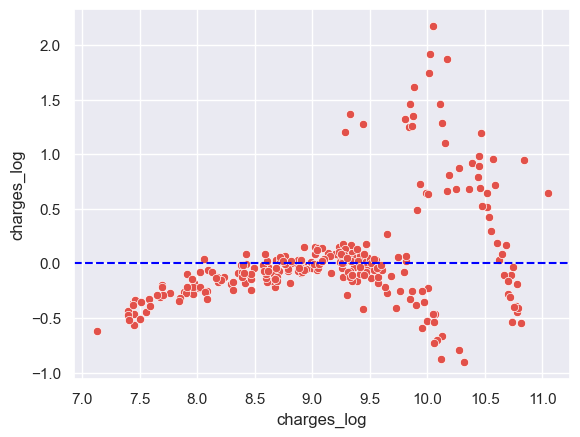

In [68]:
sns.scatterplot(x=y_test,y=test_residual)
plt.axhline(y=0,color='b',ls='--')

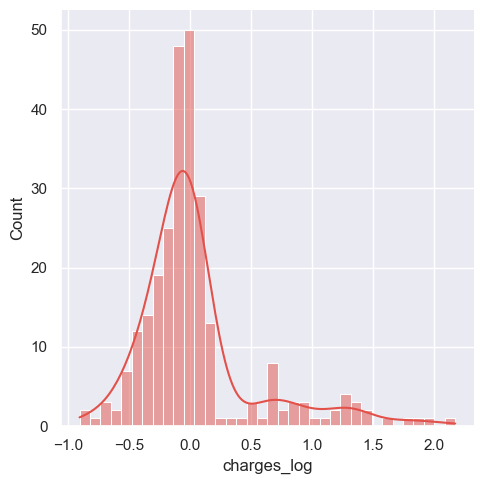

In [69]:
sns.displot(test_residual,kde=True)

In [70]:
import scipy as sp

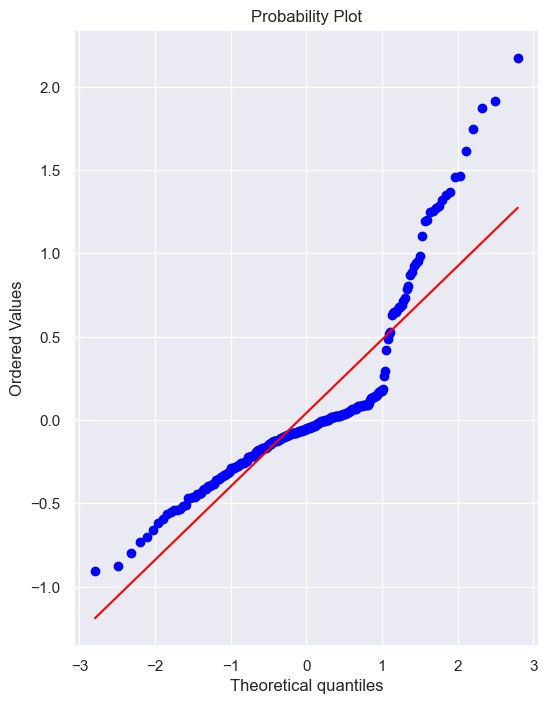

In [71]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residual,plot=ax)

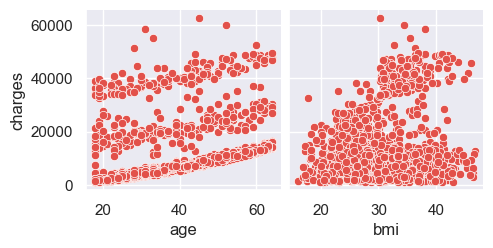

In [72]:
#checking for linearity
p = sns.pairplot(df_objs,x_vars=["age","bmi"],y_vars="charges")

            feature       VIF
0               age  7.731804
1               bmi  8.910043
2          children  1.807671
3        smoker_yes  1.256190
4          sex_male  1.996605
5  region_northwest  1.292457


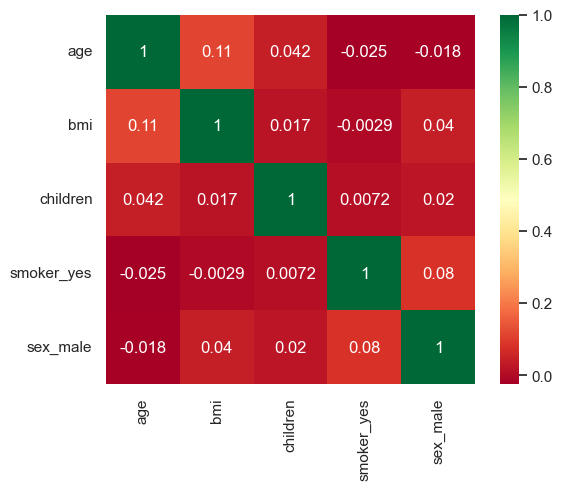

In [73]:
#checking for multicollinearity
p=sns.heatmap(df_objs[["age","bmi","children","smoker_yes","sex_male"]].corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_objs[["age","bmi","children","smoker_yes","sex_male","region_northwest"]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)